### Importing Libraries

In [4]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy import stats

### Loading the Dataset

In [5]:

data = pd.read_csv('Data_Cortex_Nuclear.csv')


In [6]:
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [7]:
#Mouse ID column is removed as it does not have any information to predict the outcome class
data = data.drop('MouseID',axis = 1)

In [8]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [9]:
summary_stats = data.describe().transpose()
print(summary_stats)

            count      mean       std       min       25%       50%       75%  \
DYRK1A_N   1077.0  0.425810  0.249362  0.145327  0.288121  0.366378  0.487711   
ITSN1_N    1077.0  0.617102  0.251640  0.245359  0.473361  0.565782  0.698032   
BDNF_N     1077.0  0.319088  0.049383  0.115181  0.287444  0.316564  0.348197   
NR1_N      1077.0  2.297269  0.347293  1.330831  2.057411  2.296546  2.528481   
NR2A_N     1077.0  3.843934  0.933100  1.737540  3.155678  3.760855  4.440011   
...           ...       ...       ...       ...       ...       ...       ...   
SYP_N      1080.0  0.446073  0.066432  0.258626  0.398082  0.448459  0.490773   
H3AcK18_N   900.0  0.169609  0.059402  0.079691  0.125848  0.158240  0.197876   
EGR1_N      870.0  0.183135  0.040406  0.105537  0.155121  0.174935  0.204542   
H3MeK4_N    810.0  0.205440  0.055514  0.101787  0.165143  0.193994  0.235215   
CaNA_N     1080.0  1.337784  0.317126  0.586479  1.081423  1.317441  1.585824   

                max  
DYRK1

## Histograms for each numerical column

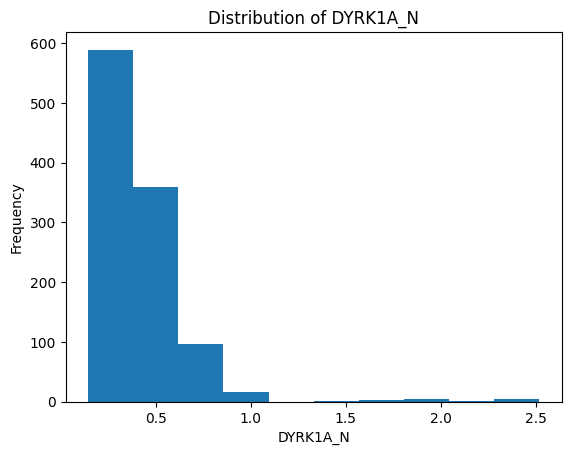

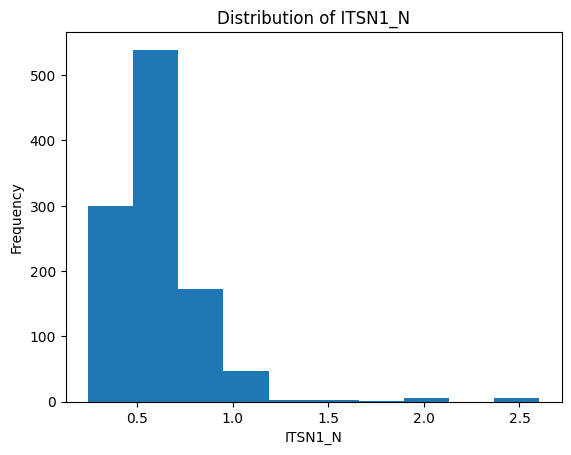

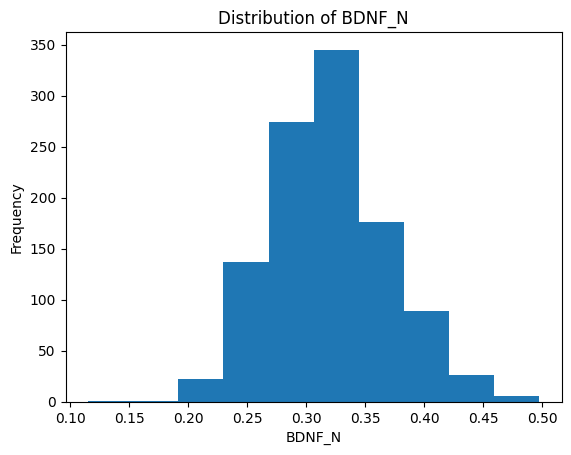

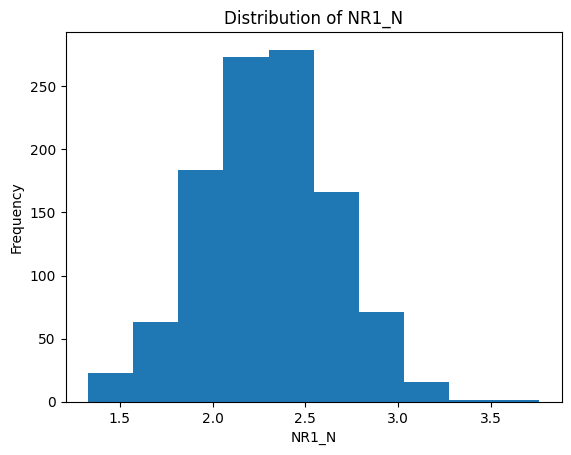

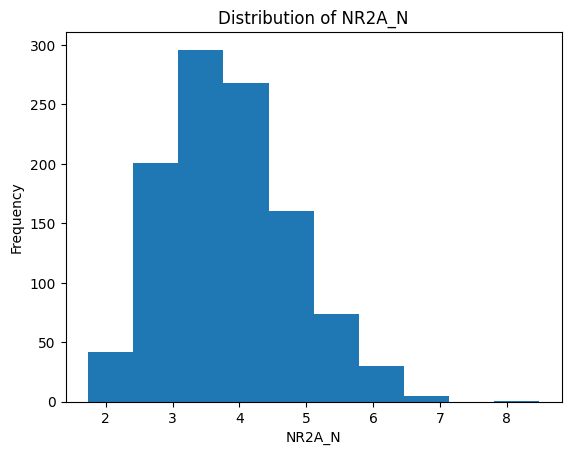

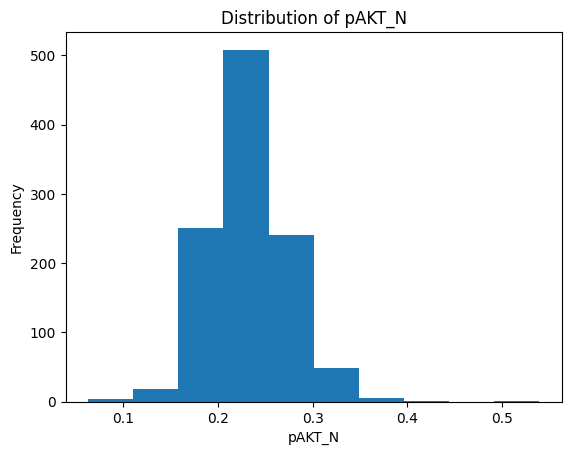

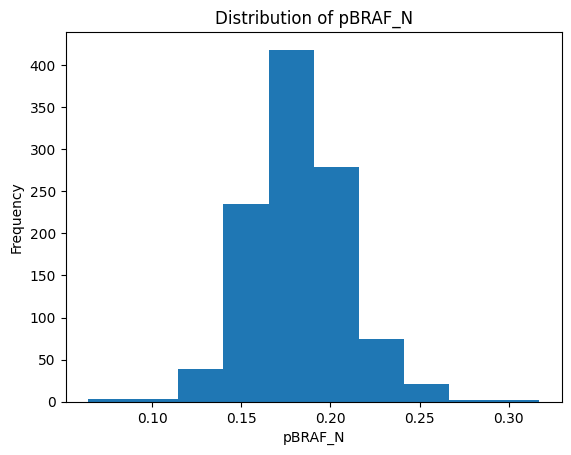

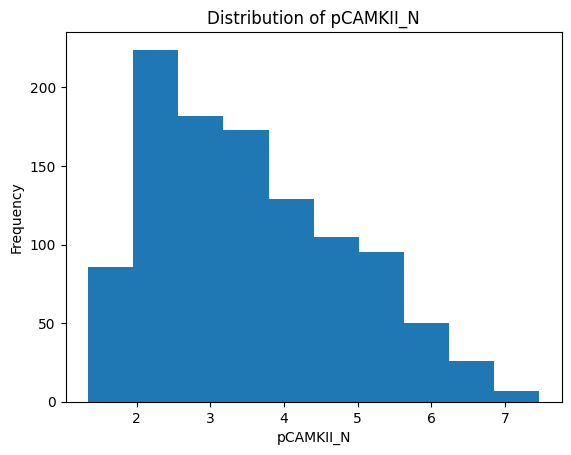

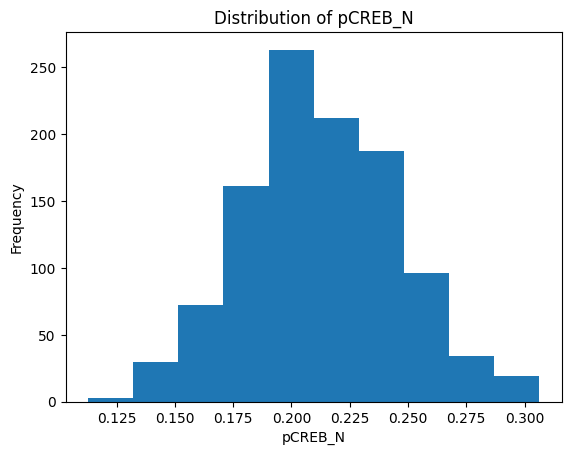

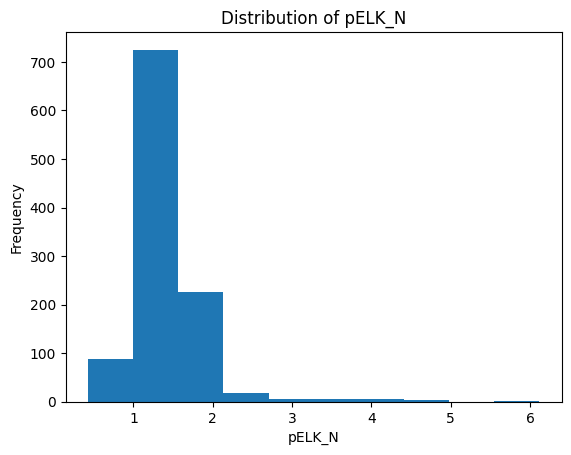

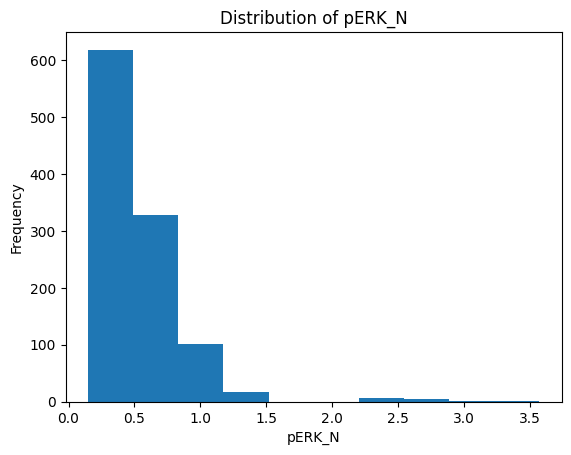

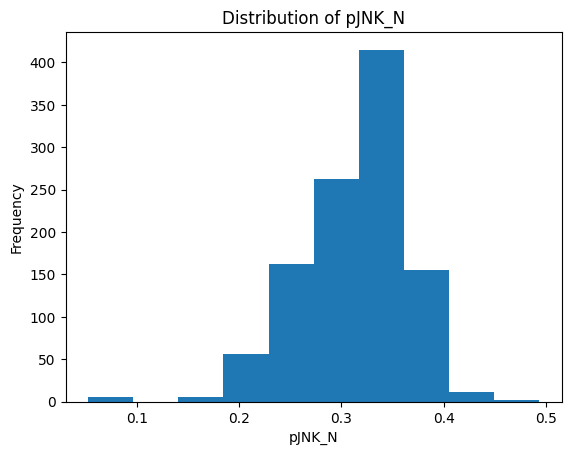

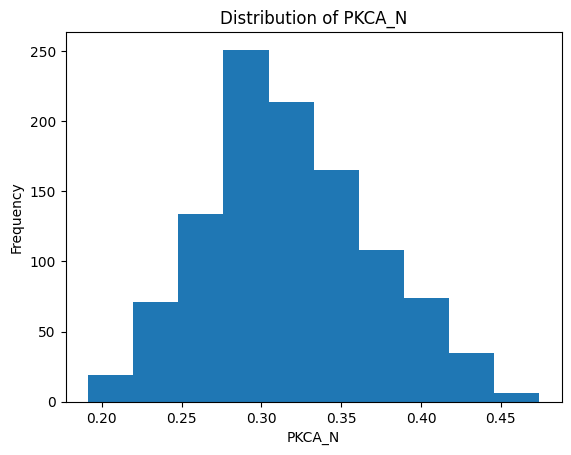

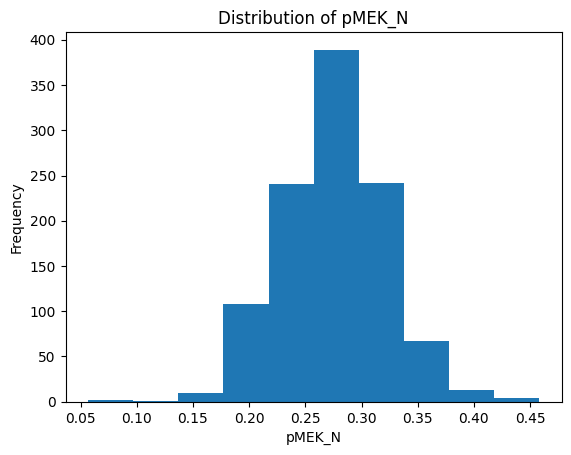

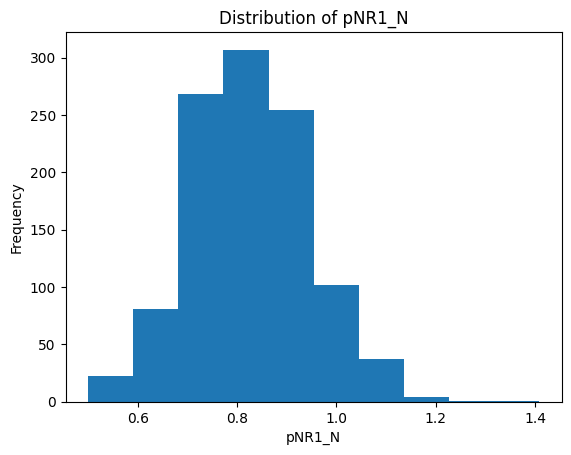

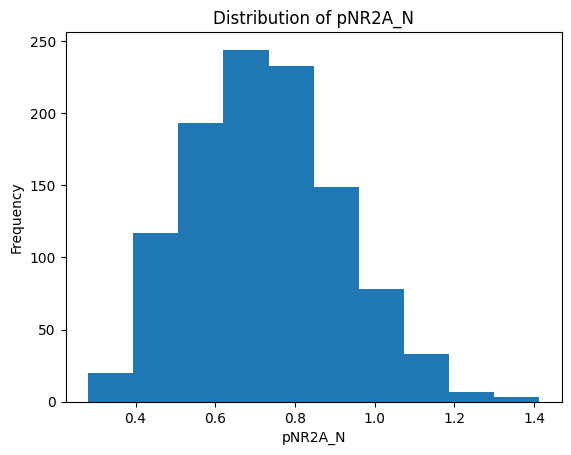

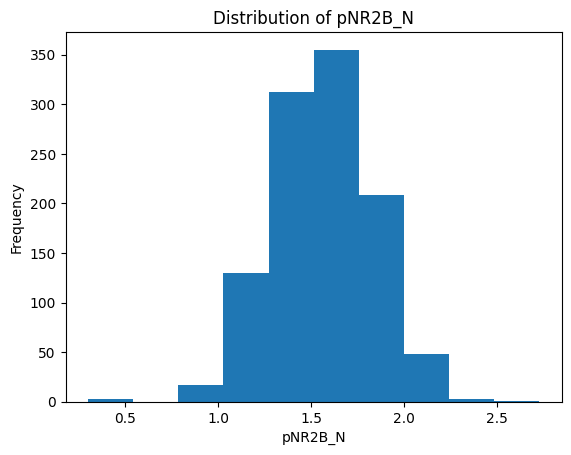

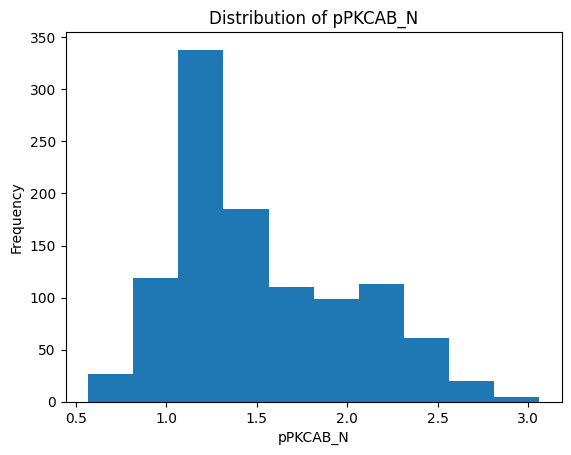

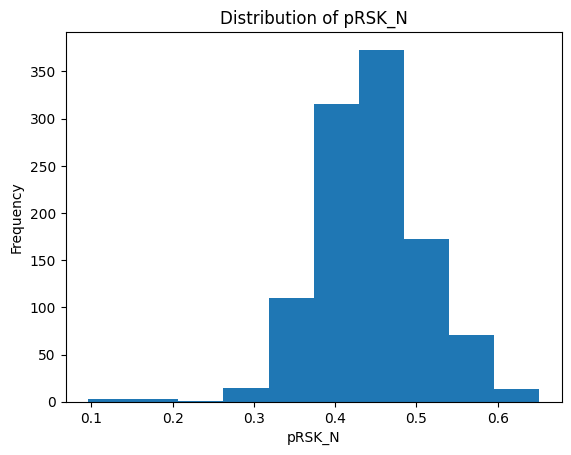

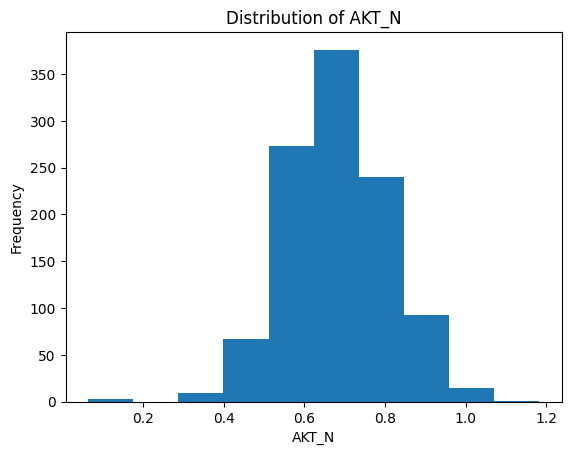

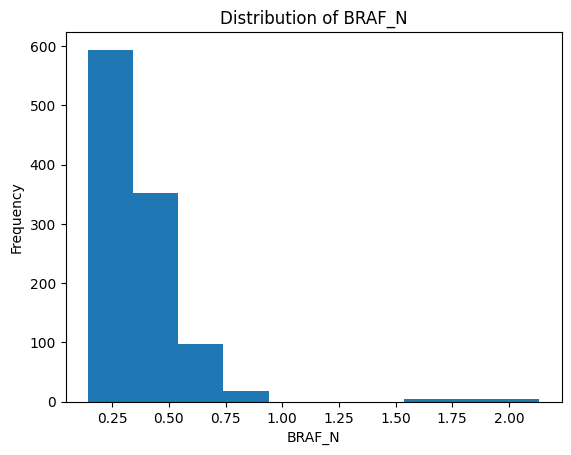

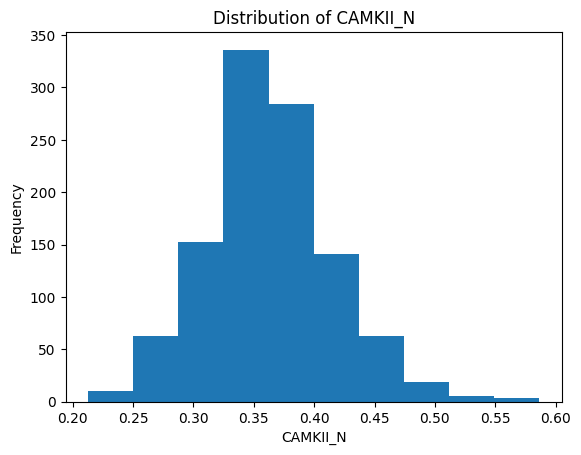

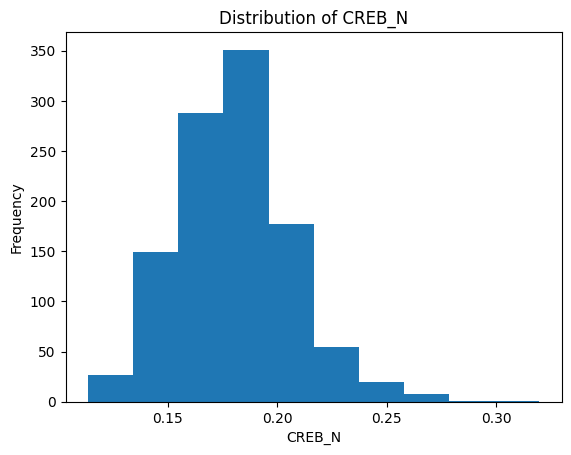

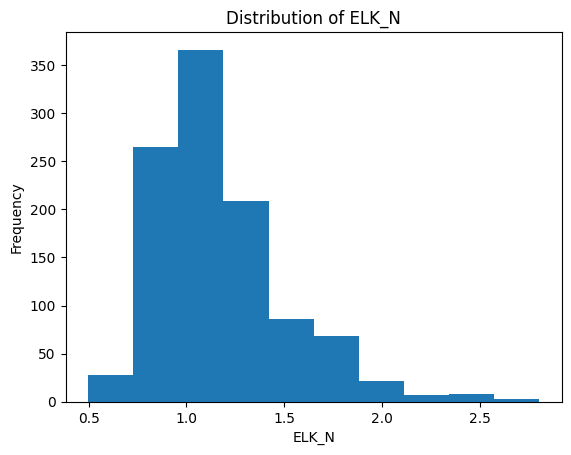

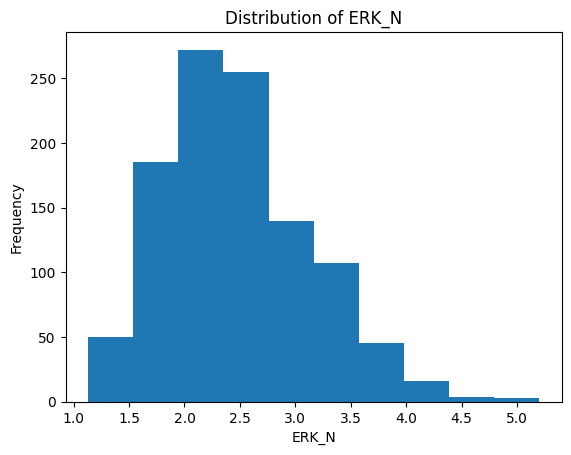

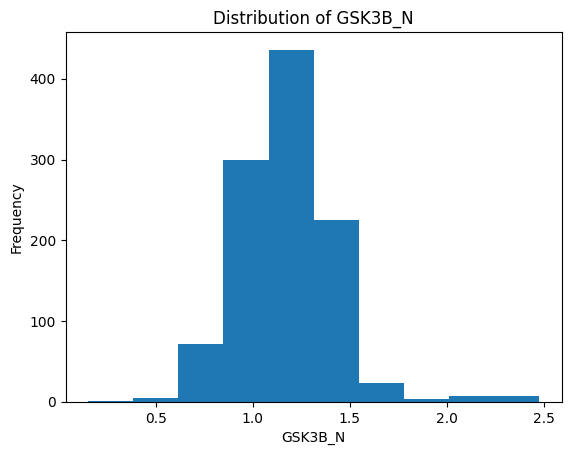

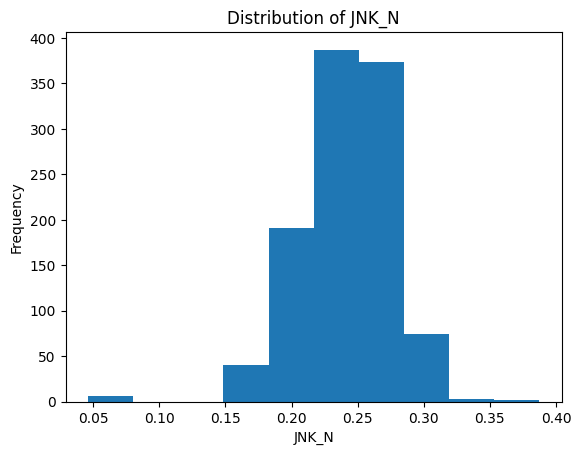

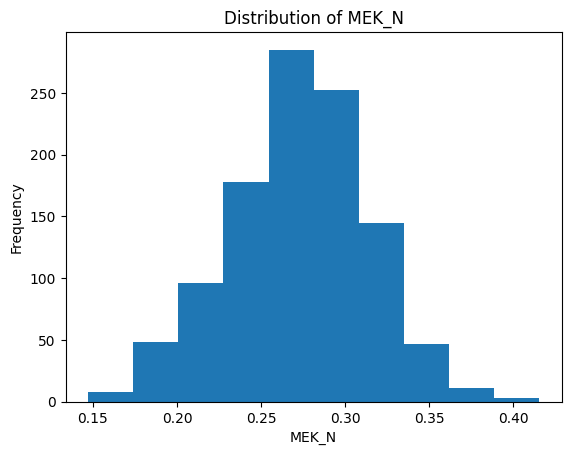

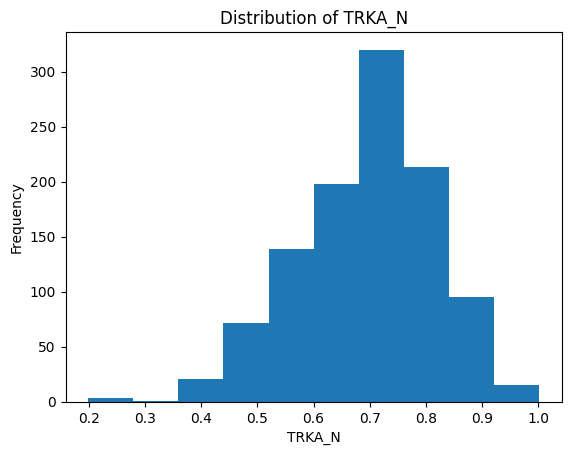

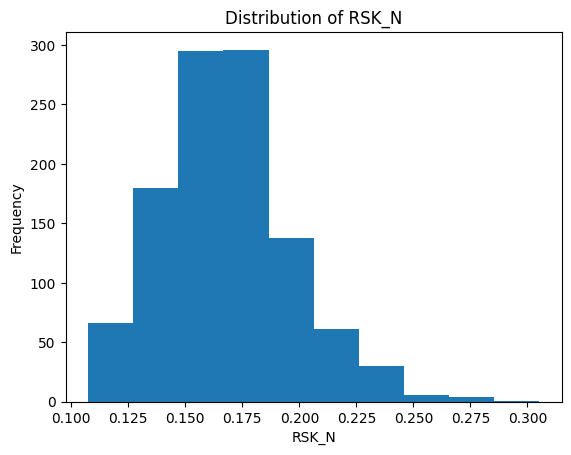

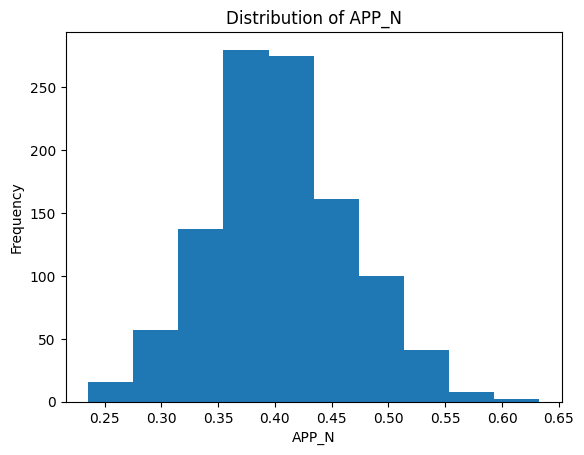

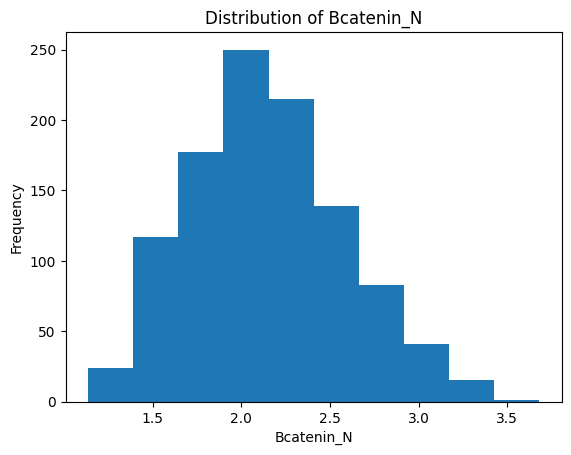

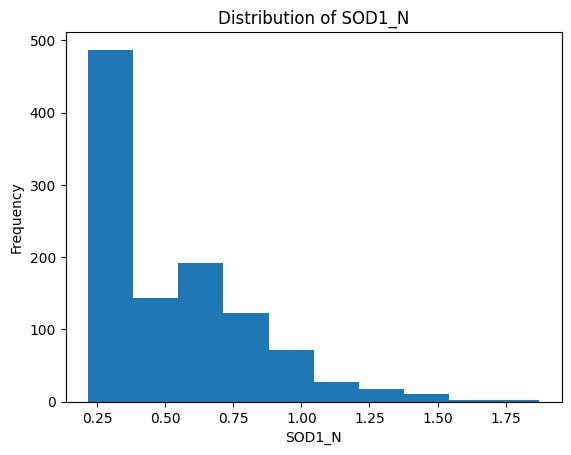

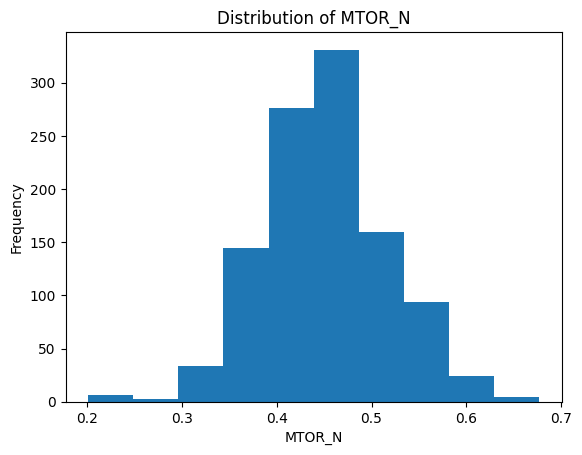

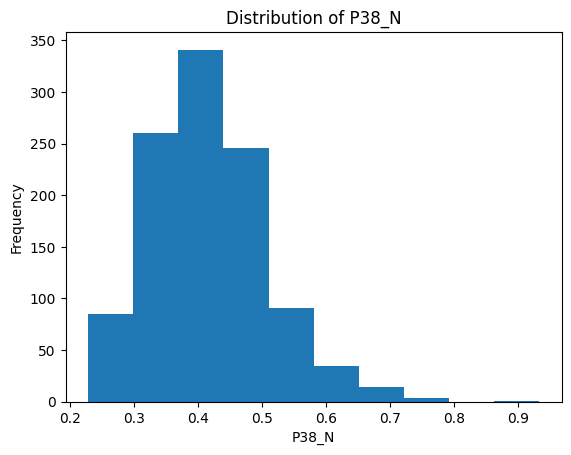

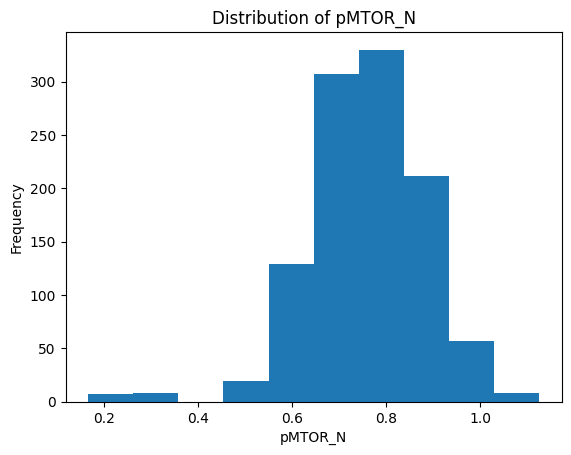

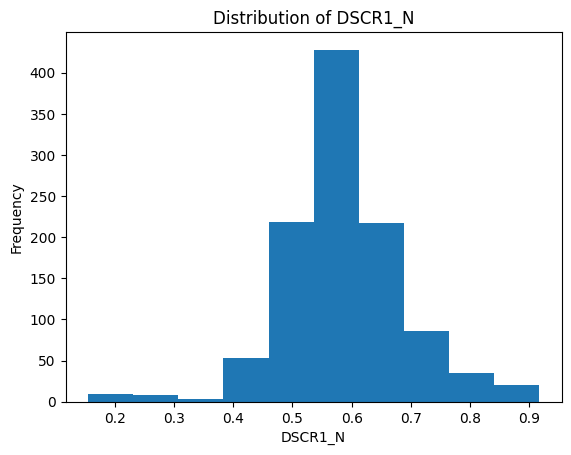

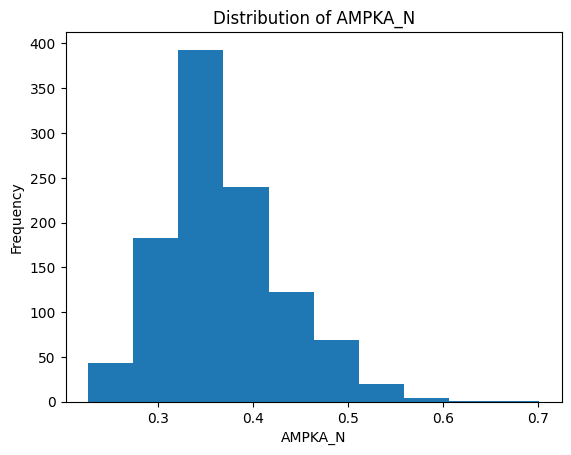

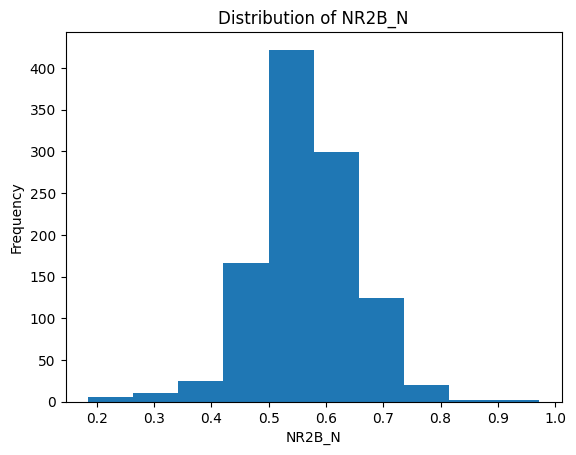

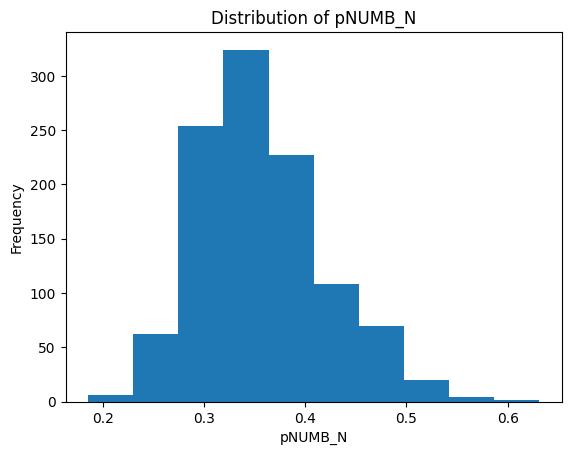

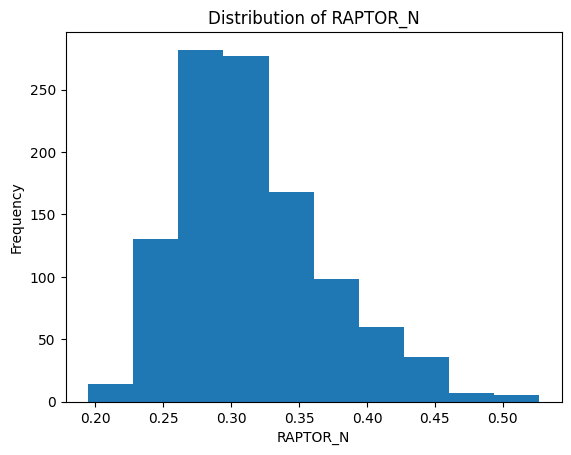

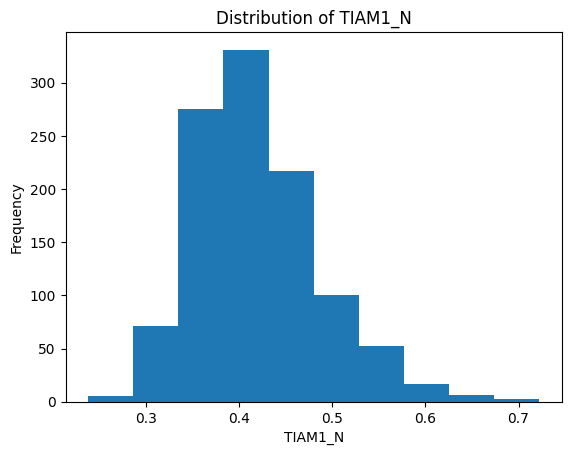

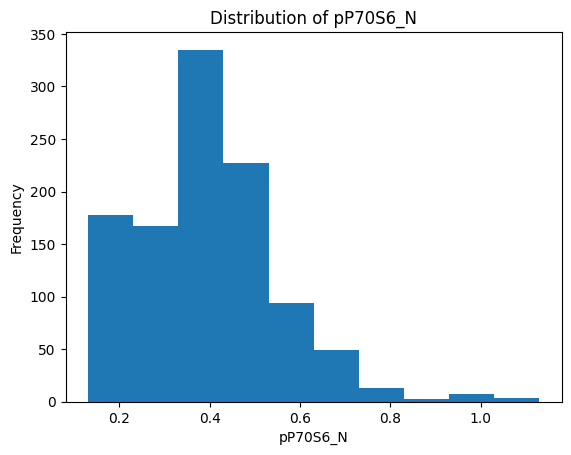

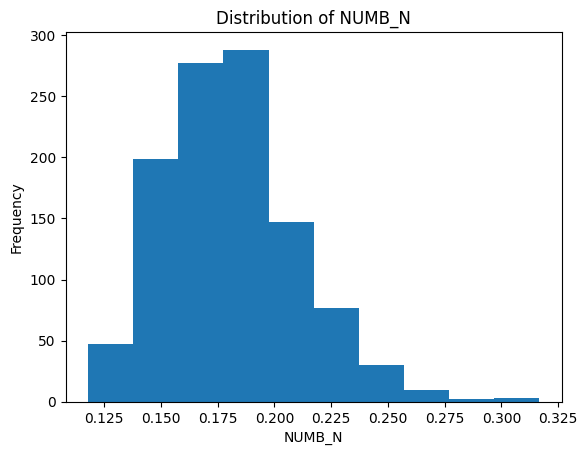

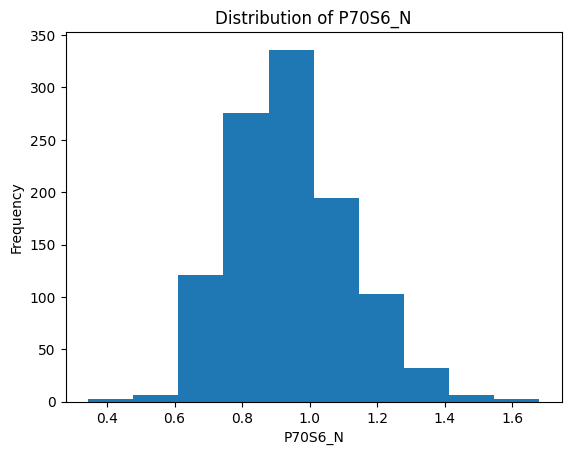

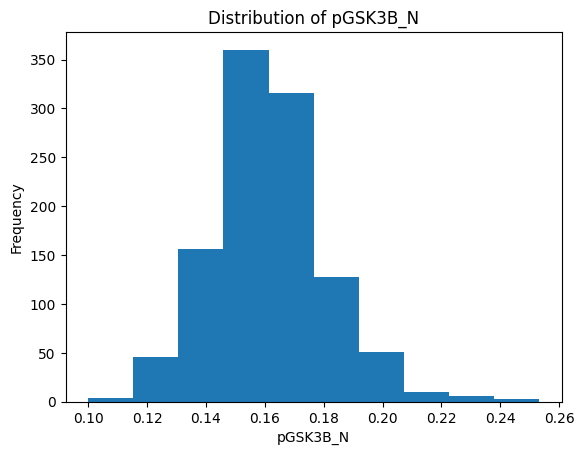

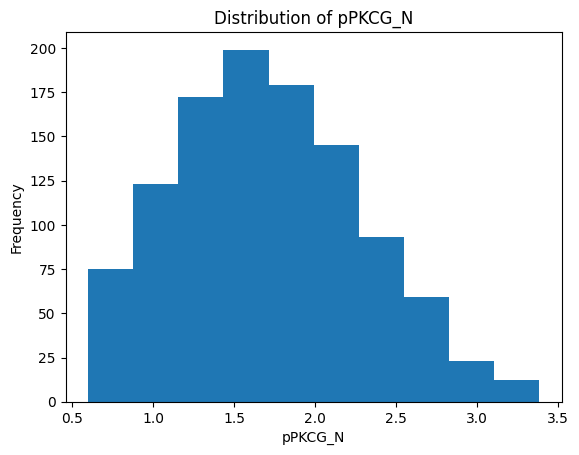

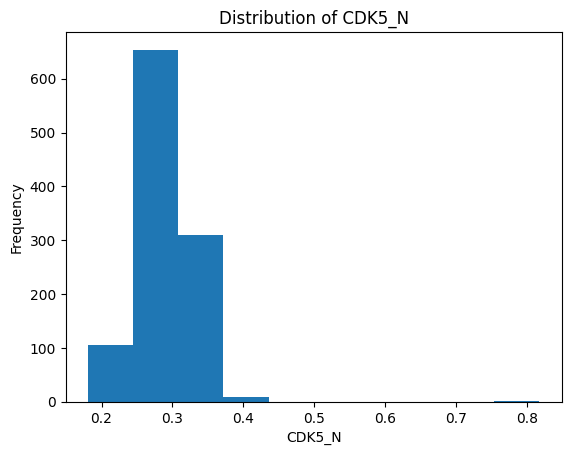

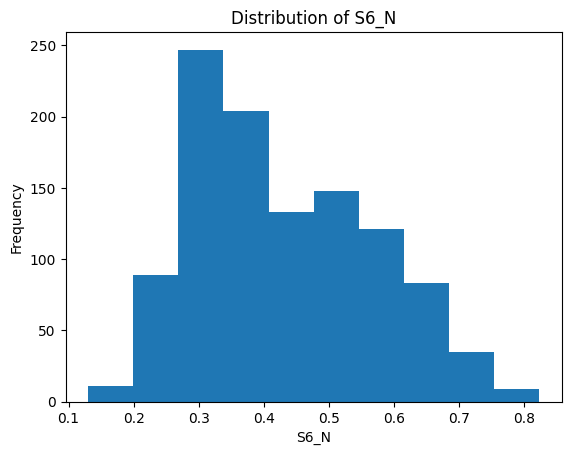

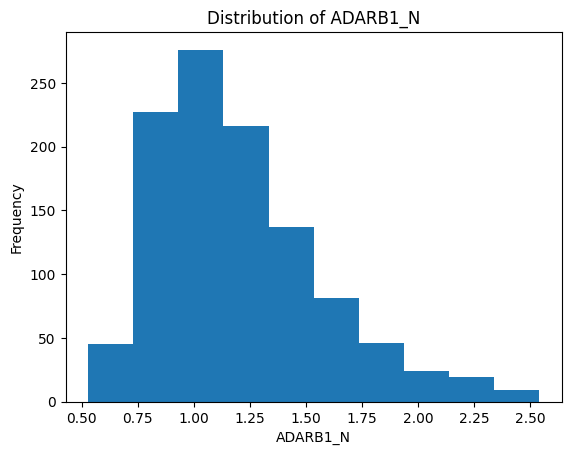

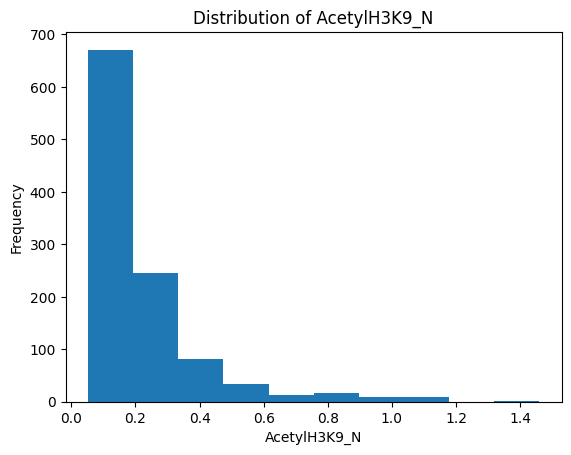

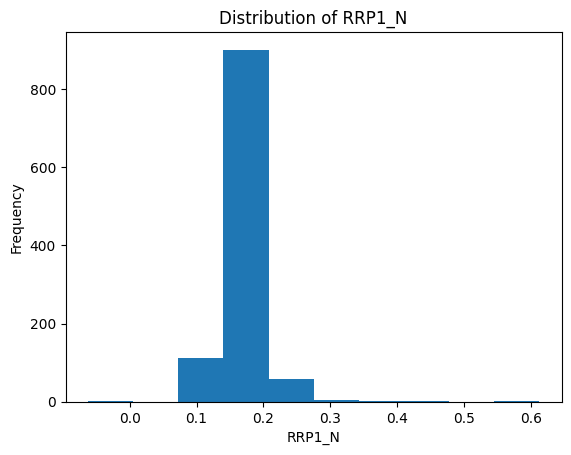

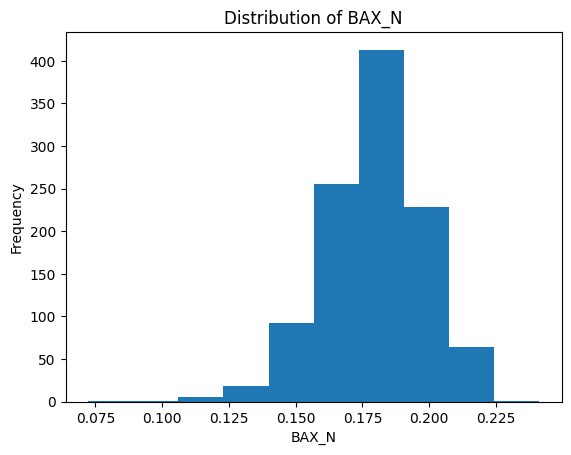

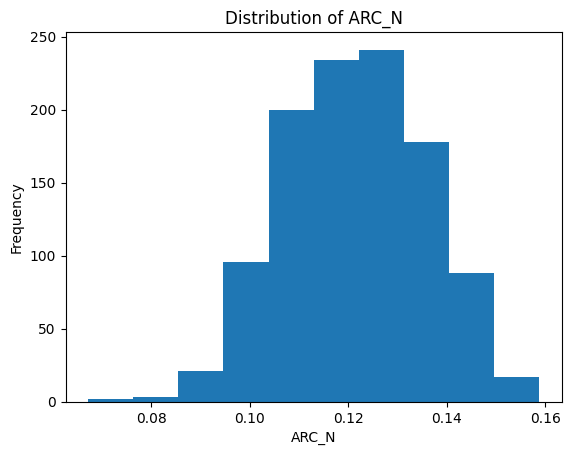

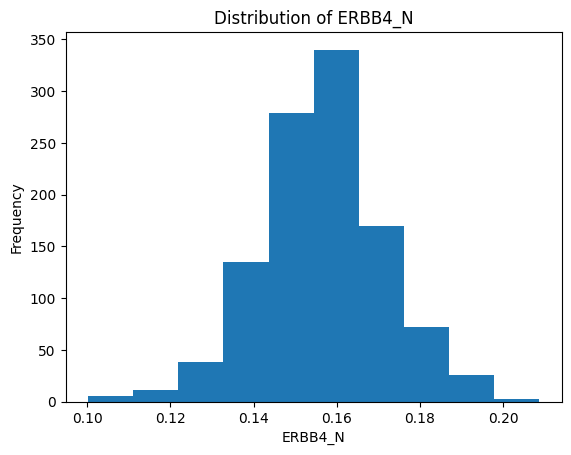

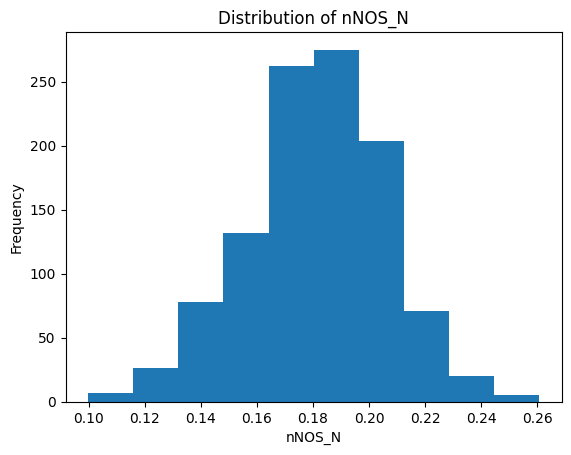

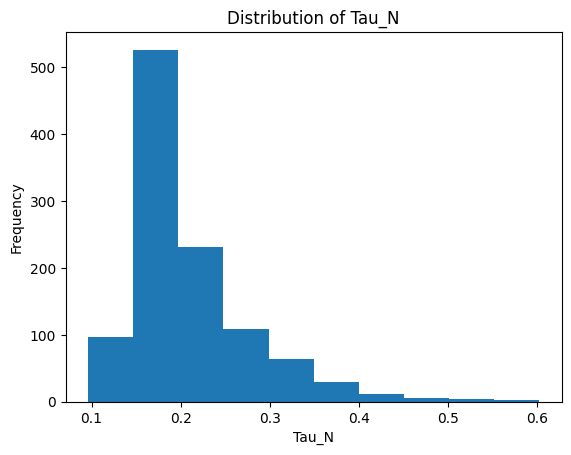

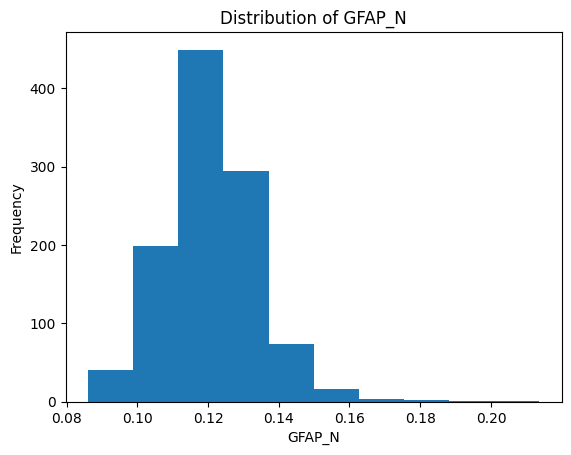

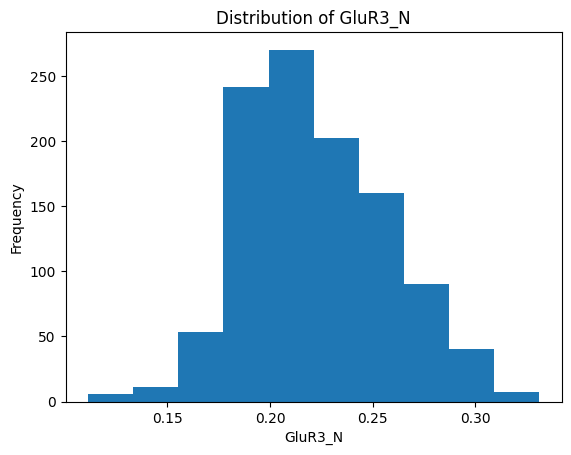

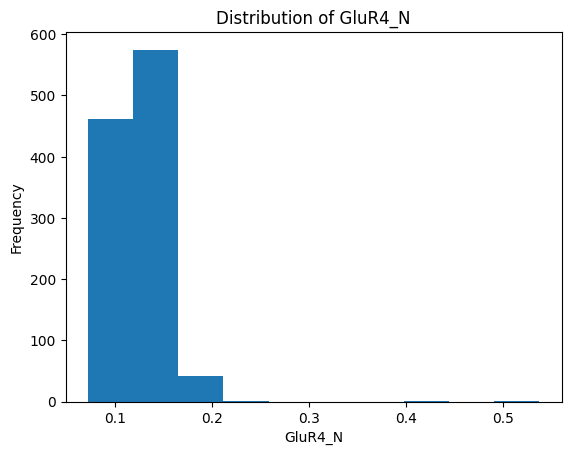

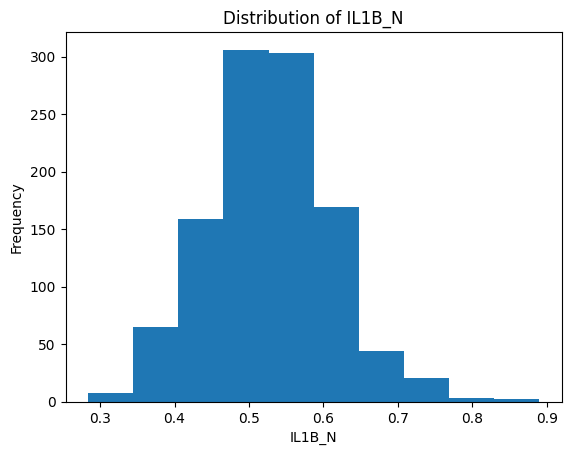

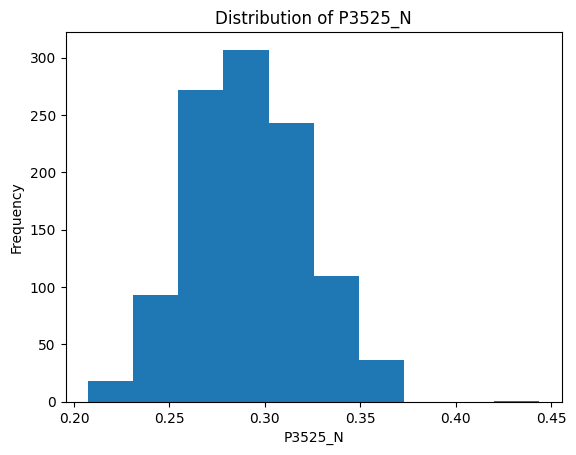

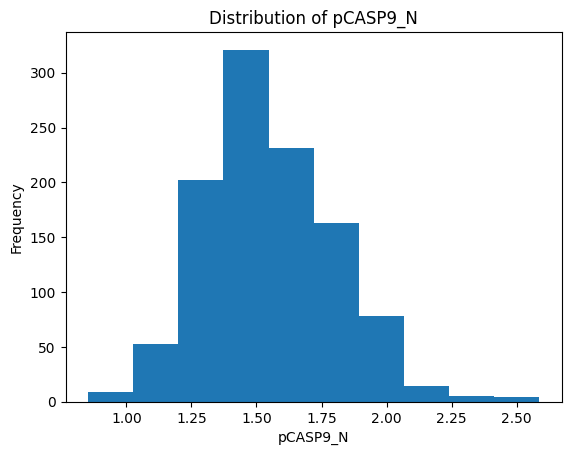

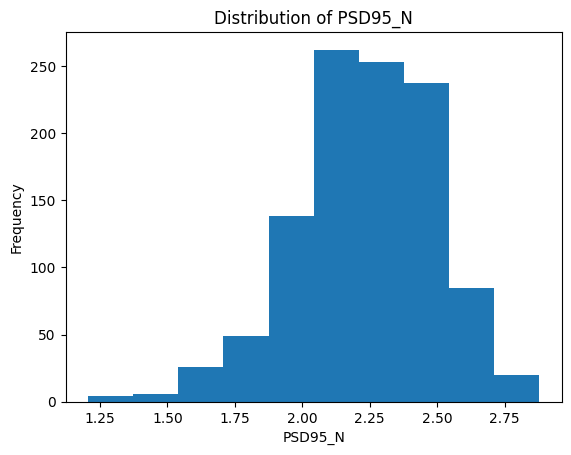

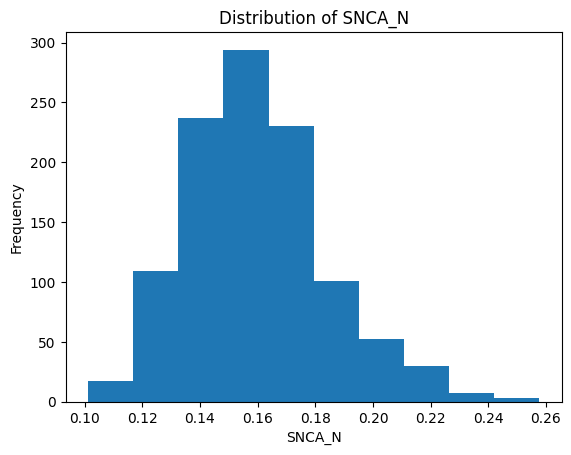

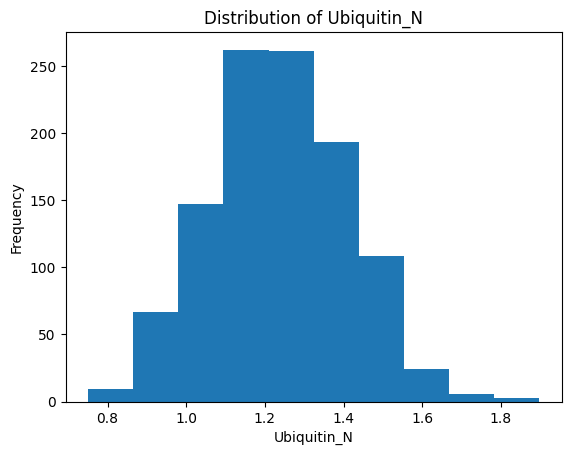

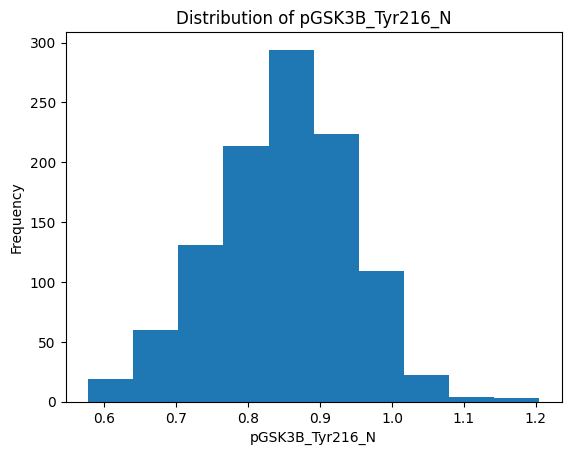

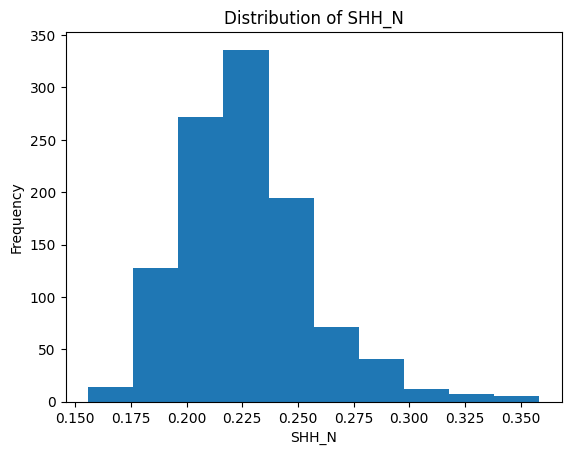

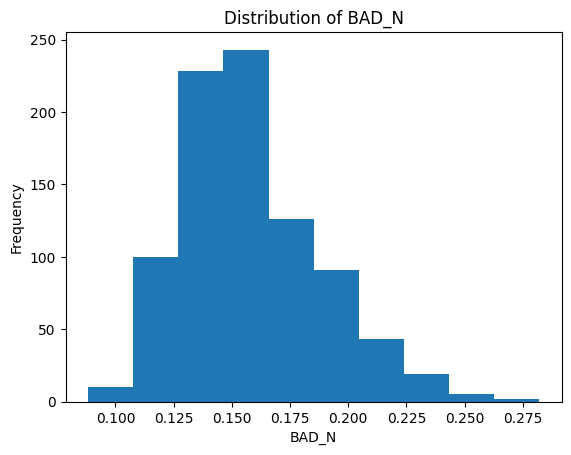

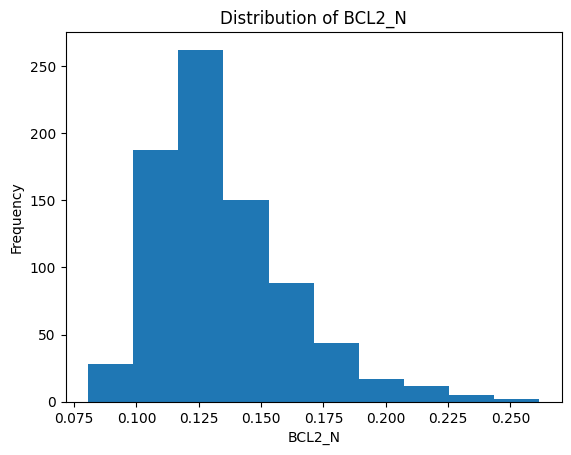

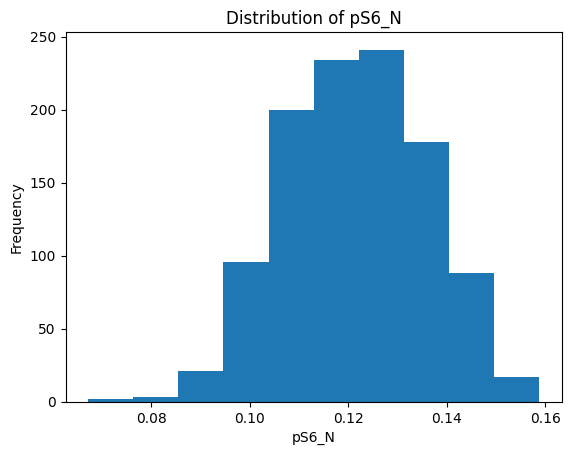

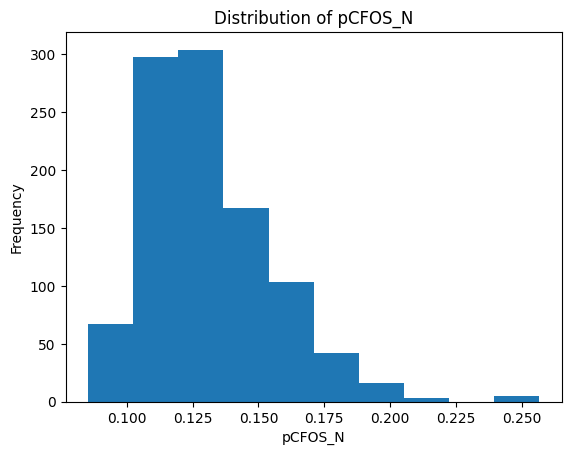

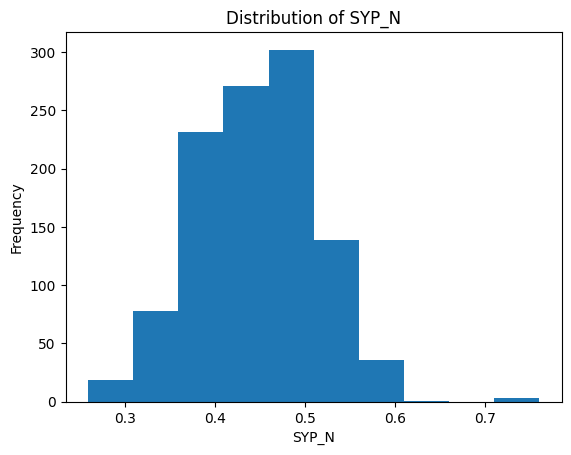

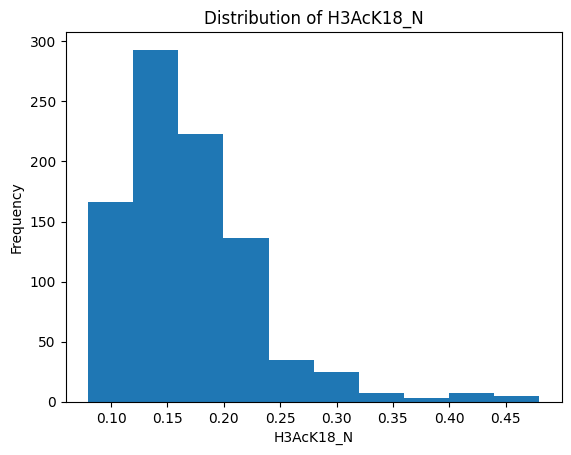

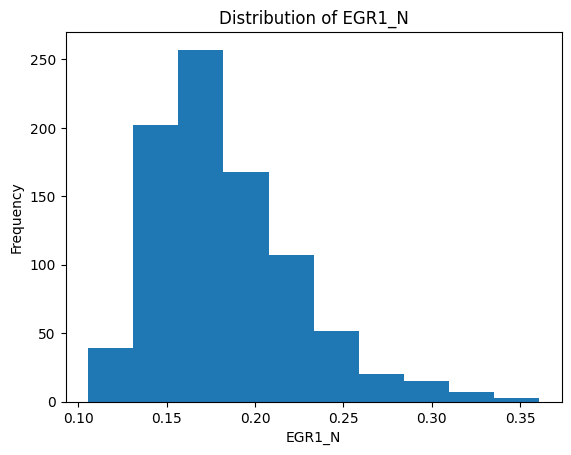

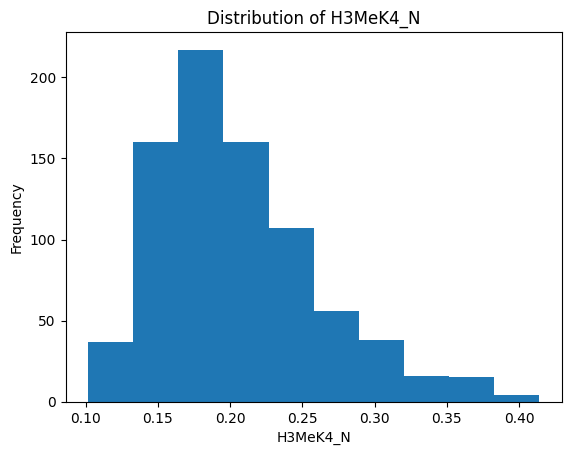

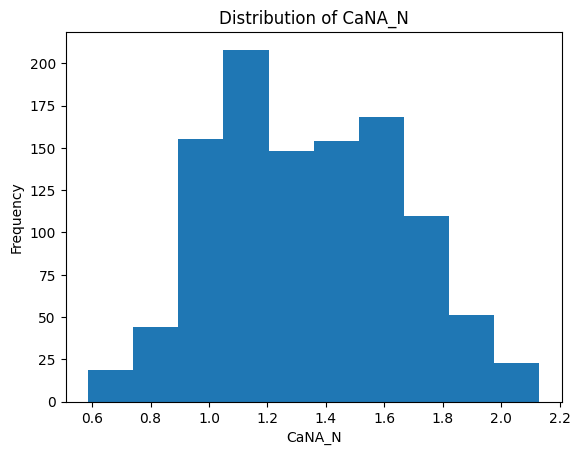

In [10]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Plot histograms for each numerical column
for column in numerical_cols:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(data[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

# Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7cb60e199b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7cb60e19a050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cb60e199870>],
 'medians': [<matplotlib.lines.Line2D at 0x7cb60e19a590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cb60e19a830>],
 'means': []}

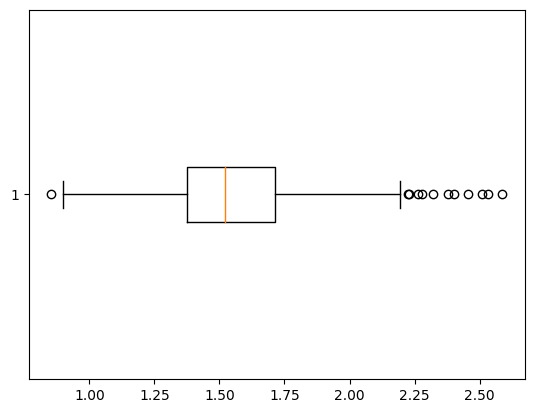

In [11]:
plt.boxplot(data["pCASP9_N"],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7cb60e31a5f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cb60e319e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cb60e31b4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cb60e31a320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cb60e31a440>],
 'means': []}

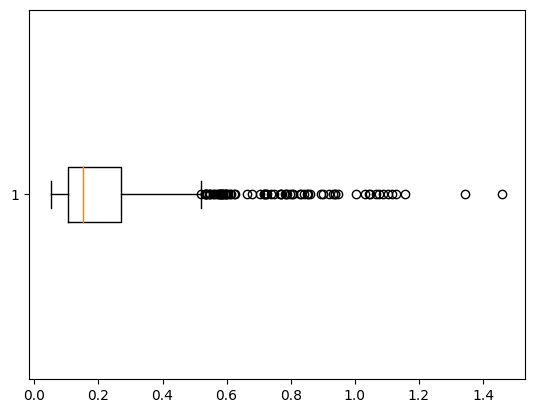

In [12]:
plt.boxplot(data["AcetylH3K9_N"],vert=False)

## Detecting Outliers

In [13]:
numerical_cols = data.select_dtypes(include=['number']).columns
for column in numerical_cols:
    z_scores = np.abs(stats.zscore(data[column]))
    threshold = 3
    outlier_count = (z_scores > threshold).sum()
    print(f"Number of outliers in {column}: {outlier_count}")

Number of outliers in DYRK1A_N: 0
Number of outliers in ITSN1_N: 0
Number of outliers in BDNF_N: 0
Number of outliers in NR1_N: 0
Number of outliers in NR2A_N: 0
Number of outliers in pAKT_N: 0
Number of outliers in pBRAF_N: 0
Number of outliers in pCAMKII_N: 0
Number of outliers in pCREB_N: 0
Number of outliers in pELK_N: 0
Number of outliers in pERK_N: 0
Number of outliers in pJNK_N: 0
Number of outliers in PKCA_N: 0
Number of outliers in pMEK_N: 0
Number of outliers in pNR1_N: 0
Number of outliers in pNR2A_N: 0
Number of outliers in pNR2B_N: 0
Number of outliers in pPKCAB_N: 0
Number of outliers in pRSK_N: 0
Number of outliers in AKT_N: 0
Number of outliers in BRAF_N: 0
Number of outliers in CAMKII_N: 0
Number of outliers in CREB_N: 0
Number of outliers in ELK_N: 0
Number of outliers in ERK_N: 0
Number of outliers in GSK3B_N: 0
Number of outliers in JNK_N: 0
Number of outliers in MEK_N: 0
Number of outliers in TRKA_N: 0
Number of outliers in RSK_N: 0
Number of outliers in APP_N: 0
N

## Class Distribution

In [14]:
class_distribution = data['class'].value_counts()
print(class_distribution)

class
c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: count, dtype: int64


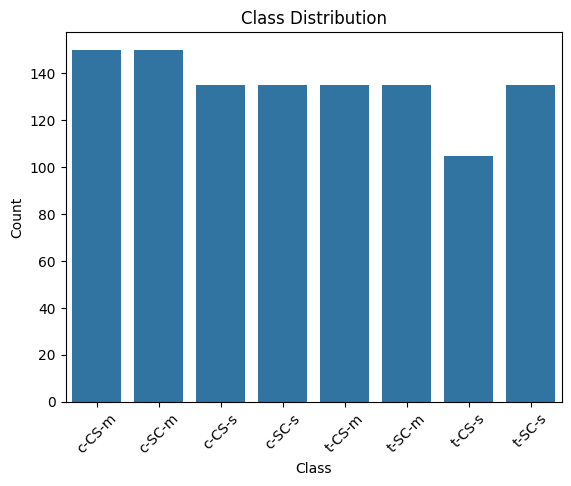

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart
sns.countplot(x='class', data=data)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45) # Rotate x-axis labels if needed for better visibility
plt.show()

The class distribution is fine, and it will not likely cause any problems of overfitting

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
x=[1,2,3,4,5]

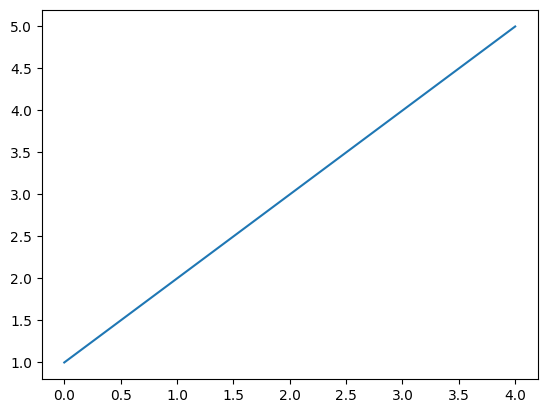

In [18]:
plt.plot(x)

## Scatter plot

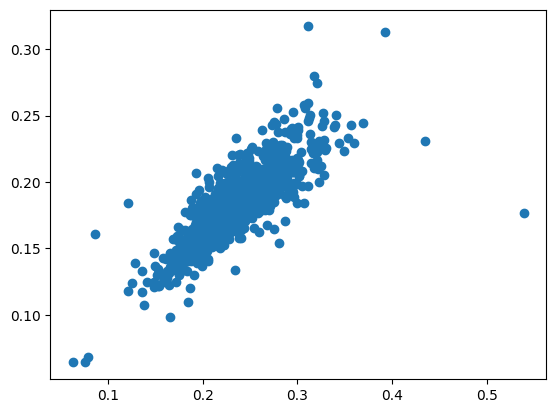

In [19]:
plt.scatter(data["pAKT_N"],data["pBRAF_N"])

## Histograms

(array([  9.,  53., 202., 321., 231., 163.,  78.,  14.,   5.,   4.]),
 array([0.85317556, 1.0264796 , 1.19978364, 1.37308768, 1.54639172,
        1.71969575, 1.89299979, 2.06630383, 2.23960787, 2.41291191,
        2.58621595]),
 <BarContainer object of 10 artists>)

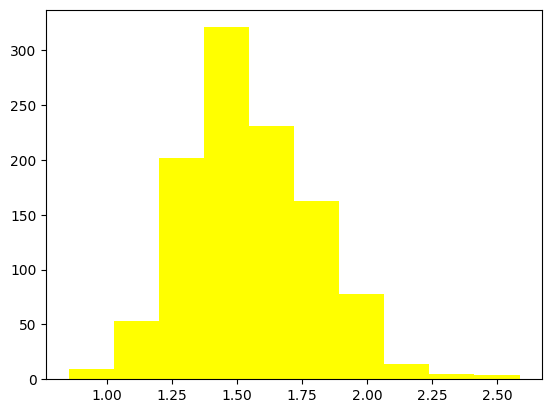

In [20]:
plt.hist(data["pCASP9_N"],color="yellow")

(array([  4.,   6.,  26.,  49., 138., 262., 253., 237.,  85.,  20.]),
 array([1.20609776, 1.37327532, 1.54045289, 1.70763045, 1.87480802,
        2.04198559, 2.20916315, 2.37634072, 2.54351829, 2.71069585,
        2.87787342]),
 <BarContainer object of 10 artists>)

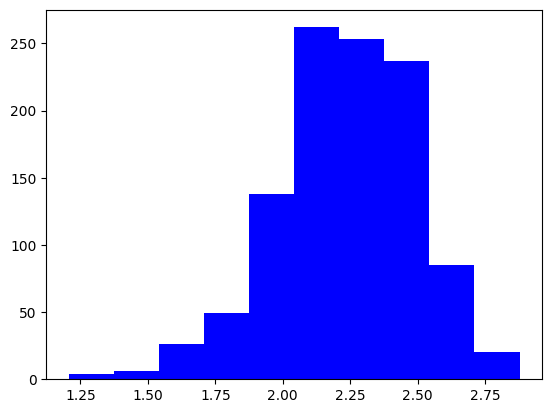

In [21]:
plt.hist(data["PSD95_N"],color="blue")

## Splitting for Model Training

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy import stats
# 2. Data Splitting
X = data.drop('class', axis=1)  # Replace 'target_variable' with your target column
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## Outlier Handling in Numerical Features

In [23]:

numerical_cols = X_train.select_dtypes(include=['number']).columns
for column in numerical_cols:
    z_scores = np.abs(stats.zscore(X_train[column]))
    threshold = 3
    X_train[column] = np.where(z_scores < threshold, X_train[column], X_train[column].median())



## Handling Missing Values in Numerical Features

In [24]:

for column in numerical_cols:
    X_train[column] = X_train[column].fillna(X_train[column].median())
    X_test[column] = X_test[column].fillna(X_train[column].median())  # Use training set median

In [25]:

correlation_matrix = X_train[numerical_cols].corr()
threshold = 0.8
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)
X_train = X_train.drop(highly_correlated, axis=1)
X_test = X_test.drop(highly_correlated, axis=1)
numerical_cols = X_train.select_dtypes(include=['number']).columns  # Update numerical columns

# Pair Plot

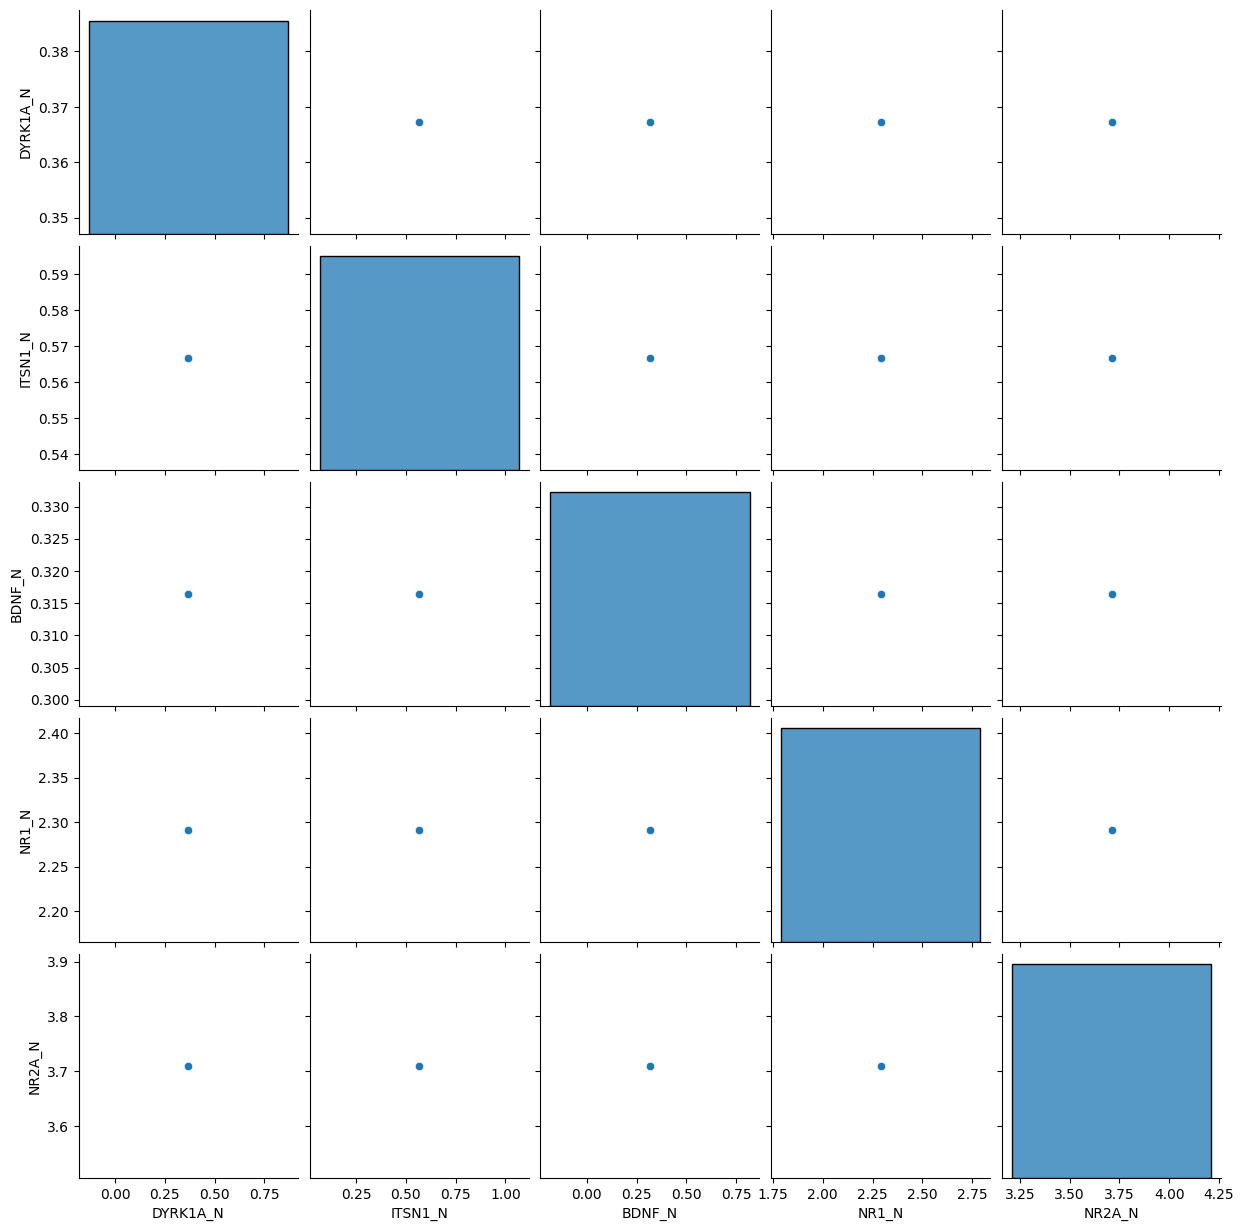

In [26]:
# Select a subset of numerical columns
subset_features = numerical_cols[:5]  # Adjust the number as needed

# Pairplot for the subset of numerical columns
sns.pairplot(X_train[subset_features])
plt.show()


## Feature Encoding and Scaling

In [27]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[categorical_cols]))
X_test_encoded = pd.DataFrame(ohe.transform(X_test[categorical_cols]))
X_train_encoded.index = X_train.index
X_test_encoded.index = X_test.index
X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])

# 8. Feature Scaling (Test Set)
X_test_scaled = scaler.transform(X_test[numerical_cols])



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
highly_correlated


{'pS6_N'}

# Model Training

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score

# 10. Model Training with RFC and Hyperparameter Tuning
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV to find best parameters
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train RFC with best parameters
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train_scaled, y_train)

# 11. Model Evaluation
# Make predictions
y_pred = best_rfc.predict(X_test_scaled)

# Evaluate performance
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))  # Use 'weighted' for multi-class
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        32
      c-CS-s       1.00      1.00      1.00        26
      c-SC-m       1.00      1.00      1.00        27
      c-SC-s       1.00      1.00      1.00        34
      t-CS-m       1.00      0.95      0.97        19
      t-CS-s       0.96      1.00      0.98        22
      t-SC-m       1.00      1.00      1.00        25
      t-SC-s       1.00      1.00      1.00        31

    accuracy                           1.00       216
   macro avg       0.99      0.99      0.99       216
weighted avg       1.00      1.00      1.00       216

Accuracy: 0.9953703703703703
F1-score: 0.9953592481370259
Recall: 0.9953703703703703


## SVM

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score

# ... (Previous code for data preprocessing)

# 10. Model Training with SVC and Hyperparameter Tuning
# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV to find best parameters
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train SVC with best parameters
best_svc = SVC(**best_params)
best_svc.fit(X_train_scaled, y_train)

# 11. Model Evaluation
# Make predictions
y_pred = best_svc.predict(X_test_scaled)

# Evaluate performance
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))  # Use 'weighted' for multi-class
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

      c-CS-m       0.91      1.00      0.96        32
      c-CS-s       1.00      1.00      1.00        26
      c-SC-m       1.00      0.96      0.98        27
      c-SC-s       1.00      0.94      0.97        34
      t-CS-m       1.00      1.00      1.00        19
      t-CS-s       1.00      0.95      0.98        22
      t-SC-m       0.93      1.00      0.96        25
      t-SC-s       1.00      0.97      0.98        31

    accuracy                           0.98       216
   macro avg       0.98      0.98      0.98       216
weighted avg       0.98      0.98      0.98       216

Accuracy: 0.9768518518518519
F1-score: 0.9770651115588455
Recall: 0.9768518518518519


## XG Boost

In [31]:

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

# ... (Previous code for data preprocessing)

# 10. Model Training with XGBoost and Hyperparameter Tuning
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Encode the target variable 'y_train'
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Perform GridSearchCV to find best parameters
xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train_encoded)  # Use encoded y_train

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train XGBoost with best parameters
best_xgb = xgb.XGBClassifier(**best_params)
best_xgb.fit(X_train_scaled, y_train_encoded)

# 11. Model Evaluation
# Encode y_test for prediction
y_test_encoded = le.transform(y_test)

# Make predictions using encoded y_test
y_pred = best_xgb.predict(X_test_scaled)

# Evaluate performance
print(classification_report(y_test_encoded, y_pred))  # Use encoded y_test
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("F1-score:", f1_score(y_test_encoded, y_pred, average='weighted'))
print("Recall:", recall_score(y_test_encoded, y_pred, average='weighted'))


Best Parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.93      0.96      0.94        26
           2       1.00      1.00      1.00        27
           3       1.00      0.97      0.99        34
           4       0.94      0.84      0.89        19
           5       0.91      0.95      0.93        22
           6       1.00      1.00      1.00        25
           7       0.97      1.00      0.98        31

    accuracy                           0.97       216
   macro avg       0.96      0.96      0.96       216
weighted avg       0.97      0.97      0.97       216

Accuracy: 0.9675925925925926
F1-score: 0.9673657311591852
Recall: 0.9675925925925926


In [32]:
print('precision:', precision_score(y_test_encoded, y_pred, average = 'weighted'))

precision: 0.967938118226804


## Neural Networks

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

# ... (Previous code for data preprocessing)

# 10. Model Training with MLPClassifier and Hyperparameter Tuning
# Define parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Perform GridSearchCV to find best parameters
mlp = MLPClassifier(max_iter=500)  # Increase max_iter if needed
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train MLPClassifier with best parameters
best_mlp = MLPClassifier(**best_params, max_iter=500)
best_mlp.fit(X_train_scaled, y_train)

# 11. Model Evaluation
# Make predictions
y_pred = best_mlp.predict(X_test_scaled)

# Evaluate performance
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))  # Use 'weighted' for multi-class
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
precision_score(y_test, y_pred, average = 'weighted')

Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}
              precision    recall  f1-score   support

      c-CS-m       0.91      1.00      0.96        32
      c-CS-s       1.00      0.96      0.98        26
      c-SC-m       0.96      0.96      0.96        27
      c-SC-s       1.00      0.91      0.95        34
      t-CS-m       0.95      1.00      0.97        19
      t-CS-s       1.00      0.95      0.98        22
      t-SC-m       0.96      1.00      0.98        25
      t-SC-s       1.00      1.00      1.00        31

    accuracy                           0.97       216
   macro avg       0.97      0.97      0.97       216
weighted avg       0.97      0.97      0.97       216

Accuracy: 0.9722222222222222
F1-score: 0.972218175998692
Recall: 0.9722222222222222


0.9738222425722425

In [34]:
precision_score(y_test, y_pred, average = 'weighted')

0.9738222425722425

## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

# ... (Your previous code for data preprocessing)

# 10. Model Training with KNN and Hyperparameter Tuning
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform GridSearchCV to find best parameters
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train KNN with best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

# 11. Model Evaluation
# Make predictions
y_pred = best_knn.predict(X_test_scaled)

# Evaluate performance
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

      c-CS-m       1.00      0.97      0.98        32
      c-CS-s       1.00      1.00      1.00        26
      c-SC-m       1.00      0.96      0.98        27
      c-SC-s       0.97      1.00      0.99        34
      t-CS-m       1.00      1.00      1.00        19
      t-CS-s       0.96      1.00      0.98        22
      t-SC-m       1.00      1.00      1.00        25
      t-SC-s       1.00      1.00      1.00        31

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216

Accuracy: 0.9907407407407407
F1-score: 0.9907453102672316
Recall: 0.9907407407407407
Precision: 0.9910743041177823


## Comparison

In [36]:
metrics = {
    'Algorithm': ['Random Forest', 'Support Vector Machine', 'XG Boost', 'Neural Networks', 'KNeighborsClassifier'],
    'Accuracy': [0.99, 0.97, 0.96, 0.98, 0.99],
    'F1-score': [0.99, 0.95, 0.94, 0.98, 0.99],
    'Recall': [0.99, 0.96, 0.95, 0.98, 0.99]
}

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)

                Algorithm  Accuracy  F1-score  Recall
0           Random Forest      0.99      0.99    0.99
1  Support Vector Machine      0.97      0.95    0.96
2                XG Boost      0.96      0.94    0.95
3         Neural Networks      0.98      0.98    0.98
4    KNeighborsClassifier      0.99      0.99    0.99


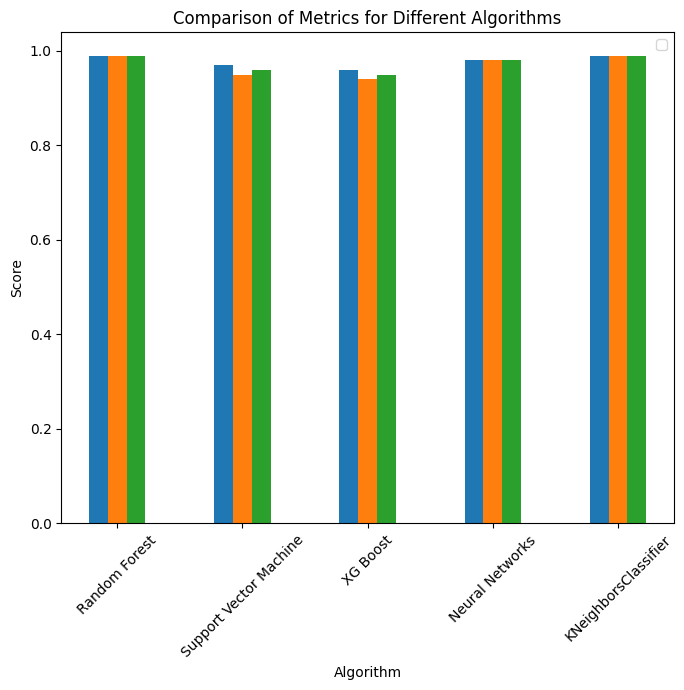

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define metrics for different algorithms
metrics = {
    'Algorithm': ['Random Forest', 'Support Vector Machine', 'XG Boost', 'Neural Networks', 'KNeighborsClassifier'],
    'Accuracy': [0.99, 0.97, 0.96, 0.98, 0.99],
    'F1-score': [0.99, 0.95, 0.94, 0.98, 0.99],
    'Recall': [0.99, 0.96, 0.95, 0.98, 0.99]
}

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Set the positions and width for the bars
bar_width = 0.15
positions = np.arange(len(metrics_df['Algorithm']))

# Plotting
plt.figure(figsize=(7, 7))
bar1 = plt.bar(positions - bar_width, metrics_df['Accuracy'], bar_width)
bar2 = plt.bar(positions, metrics_df['F1-score'], bar_width )
bar3 = plt.bar(positions + bar_width, metrics_df['Recall'], bar_width)

# Adding labels
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Comparison of Metrics for Different Algorithms')
plt.xticks(positions, metrics_df['Algorithm'], rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [38]:
import pandas as pd

# Define metrics for different algorithms
metrics = {
    'Algorithm': ['Random Forest', 'Support Vector Machine', 'XG Boost', 'Neural Networks', 'KNeighborsClassifier'],
    'Accuracy': [0.99, 0.97, 0.96, 0.98, 0.99],
    'F1-score': [0.99, 0.95, 0.94, 0.98, 0.99],
    'Recall': [0.99, 0.96, 0.95, 0.98, 0.99]
}

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Find the model with the highest Accuracy
best_accuracy = metrics_df.loc[metrics_df['Accuracy'].idxmax()]

# Find the model with the highest F1-score
best_f1_score = metrics_df.loc[metrics_df['F1-score'].idxmax()]

# Find the model with the highest Recall
best_recall = metrics_df.loc[metrics_df['Recall'].idxmax()]



In [39]:

# Print the results
print(f"Best Model by Accuracy: {best_accuracy['Algorithm']} with Accuracy {best_accuracy['Accuracy']:.2f}")
print(f"Best Model by F1-score: {best_f1_score['Algorithm']} with F1-score {best_f1_score['F1-score']:.2f}")
print(f"Best Model by Recall: {best_recall['Algorithm']} with Recall {best_recall['Recall']:.2f}")

# Determine the overall best model
overall_best = metrics_df.loc[metrics_df[['Accuracy', 'F1-score', 'Recall']].mean(axis=1).idxmax()]
print(f"Overall Best Model: {overall_best['Algorithm']} with Accuracy {overall_best['Accuracy']:.2f}, F1-score {overall_best['F1-score']:.2f}, Recall {overall_best['Recall']:.2f}")


Best Model by Accuracy: Random Forest with Accuracy 0.99
Best Model by F1-score: Random Forest with F1-score 0.99
Best Model by Recall: Random Forest with Recall 0.99
Overall Best Model: Random Forest with Accuracy 0.99, F1-score 0.99, Recall 0.99


# Final Classification

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score

# 10. Model Training with RFC and Hyperparameter Tuning
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV to find best parameters
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train RFC with best parameters
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train_scaled, y_train)

# 11. Model Evaluation
# Make predictions


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(max_depth=10, n_estimators=200)

In [41]:
y_pred = best_rfc.predict(X_test_scaled)
y_pred


array(['c-CS-s', 'c-SC-s', 't-SC-m', 't-CS-m', 't-SC-s', 't-CS-m',
       't-SC-s', 't-SC-s', 't-SC-s', 't-CS-s', 't-SC-s', 't-CS-m',
       't-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 'c-CS-s', 'c-SC-s',
       't-CS-s', 't-CS-s', 'c-CS-m', 'c-CS-m', 'c-SC-s', 'c-CS-s',
       'c-SC-s', 't-SC-s', 't-SC-m', 'c-CS-s', 't-SC-s', 't-SC-m',
       't-CS-m', 't-CS-m', 'c-CS-m', 'c-SC-m', 'c-SC-m', 't-CS-m',
       't-SC-m', 'c-CS-m', 'c-CS-s', 't-SC-s', 'c-CS-s', 't-SC-m',
       'c-CS-s', 't-SC-s', 't-SC-s', 'c-CS-m', 'c-CS-m', 'c-CS-m',
       't-SC-m', 'c-SC-s', 'c-SC-m', 'c-SC-s', 'c-CS-s', 'c-SC-m',
       't-CS-m', 't-CS-s', 't-CS-s', 't-CS-m', 'c-SC-s', 't-CS-s',
       'c-SC-s', 't-SC-s', 't-CS-s', 'c-SC-m', 't-CS-s', 't-SC-m',
       't-CS-s', 'c-SC-s', 'c-SC-s', 't-SC-m', 'c-SC-s', 't-SC-s',
       't-CS-m', 'c-CS-s', 'c-CS-m', 't-CS-m', 't-SC-s', 't-SC-s',
       't-CS-s', 't-SC-s', 'c-SC-m', 't-CS-m', 'c-CS-m', 'c-CS-m',
       't-SC-m', 'c-CS-s', 't-SC-m', 'c-CS-s', 't-SC-s', 'c-CS

## Top 5 important Proteins

In [47]:
# Make predictions
y_pred = best_rfc.predict(X_test_scaled)

# Print the predictions
print("Predictions:")
print(y_pred)

# Identify the key proteins (features) that are most important for classification
feature_importances = best_rfc.feature_importances_
feature_names = X_train.columns

# Combine feature names and importances into a list of tuples
features_importance_list = list(zip(feature_names, feature_importances))

# Sort the list by importances in descending order
sorted_features = sorted(features_importance_list, key=lambda x: x[1], reverse=True)

# Select the top 5 features
top_features = [feature for feature, importance in sorted_features[:5]]

# Display the top 5 most important features
print("Top 5 Most Important Features:")
for feature in top_features:
    print(feature)


Predictions:
['c-CS-s' 'c-SC-s' 't-SC-m' 't-CS-m' 't-SC-s' 't-CS-m' 't-SC-s' 't-SC-s'
 't-SC-s' 't-CS-s' 't-SC-s' 't-CS-m' 't-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s'
 'c-CS-s' 'c-SC-s' 't-CS-s' 't-CS-s' 'c-CS-m' 'c-CS-m' 'c-SC-s' 'c-CS-s'
 'c-SC-s' 't-SC-s' 't-SC-m' 'c-CS-s' 't-SC-s' 't-SC-m' 't-CS-m' 't-CS-m'
 'c-CS-m' 'c-SC-m' 'c-SC-m' 't-CS-m' 't-SC-m' 'c-CS-m' 'c-CS-s' 't-SC-s'
 'c-CS-s' 't-SC-m' 'c-CS-s' 't-SC-s' 't-SC-s' 'c-CS-m' 'c-CS-m' 'c-CS-m'
 't-SC-m' 'c-SC-s' 'c-SC-m' 'c-SC-s' 'c-CS-s' 'c-SC-m' 't-CS-m' 't-CS-s'
 't-CS-s' 't-CS-m' 'c-SC-s' 't-CS-s' 'c-SC-s' 't-SC-s' 't-CS-s' 'c-SC-m'
 't-CS-s' 't-SC-m' 't-CS-s' 'c-SC-s' 'c-SC-s' 't-SC-m' 'c-SC-s' 't-SC-s'
 't-CS-m' 'c-CS-s' 'c-CS-m' 't-CS-m' 't-SC-s' 't-SC-s' 't-CS-s' 't-SC-s'
 'c-SC-m' 't-CS-m' 'c-CS-m' 'c-CS-m' 't-SC-m' 'c-CS-s' 't-SC-m' 'c-CS-s'
 't-SC-s' 'c-CS-m' 't-CS-s' 'c-CS-m' 'c-SC-m' 'c-SC-s' 'c-CS-s' 't-SC-s'
 't-CS-s' 'c-SC-s' 'c-CS-m' 'c-SC-m' 'c-SC-s' 't-SC-m' 't-SC-s' 't-SC-s'
 'c-CS-s' 't-CS-m' 'c-SC-s' 'c-CS-m' '

We chose Random Forest over KNeighborsClassifier due to its superior handling of large datasets and its ability to provide greater insights into feature importance, despite both models having identical top metrics (Accuracy, F1-score, Recall).